In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy

In [2]:
data_1 = pd.read_excel('Istanbul_StockMarket/Istanbul_StockMarket_09-11.xlsx', header = 0, index_col = 0)
data_1.index = pd.to_datetime(data_1.index, format='%Y-%m-%d')

In [3]:
data_1.head()

,ISE_TL_BASED,ISE_USD_BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [4]:
data_2 = pd.read_excel('Istanbul_StockMarket/Istanbul_StockMarket_12-14.xlsx', header = 0, index_col = 0)
data_2.index = pd.to_datetime(data_2.index, format='%Y-%m-%d')

In [75]:
data_2.head(10)

,ISE_TL_BASED,ISE_USD_BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2012-01-05,0.042904,0.046051,-0.003743,0.001755,0.004284,0.000000,0.026512,0.010793,0.037082
2012-01-06,0.030511,0.038175,0.006229,0.006764,0.014152,0.004579,0.016082,0.009640,0.011404
2012-01-07,-0.034634,-0.031624,-0.024375,-0.014266,-0.031608,0.019022,-0.030514,-0.014512,-0.026020
2012-01-08,-0.074650,-0.101659,0.002713,-0.009381,-0.000513,-0.044067,0.024041,-0.004727,-0.025251
2012-01-09,0.011832,0.011590,-0.017227,-0.015898,-0.013981,-0.004921,-0.008299,-0.009340,-0.010143
2012-01-12,-0.035029,-0.050833,-0.018258,-0.010821,-0.005528,-0.053942,-0.045772,-0.010584,-0.029419
2012-01-13,0.018534,-0.000327,0.001405,-0.014139,-0.006756,0.000000,0.003036,-0.010387,-0.006275
2012-01-14,-0.049401,-0.042663,-0.027226,-0.037907,-0.056040,0.003204,-0.034256,-0.038437,-0.011280
2012-01-15,0.000794,-0.020721,0.001063,-0.015640,-0.015768,-0.055492,0.025767,-0.010260,-0.030457


In [6]:
data = pd.concat([data_1, data_2])


In [7]:
data.shape, data_1.shape, data_2.shape 

((1072, 9), (536, 9), (536, 9))

In [8]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


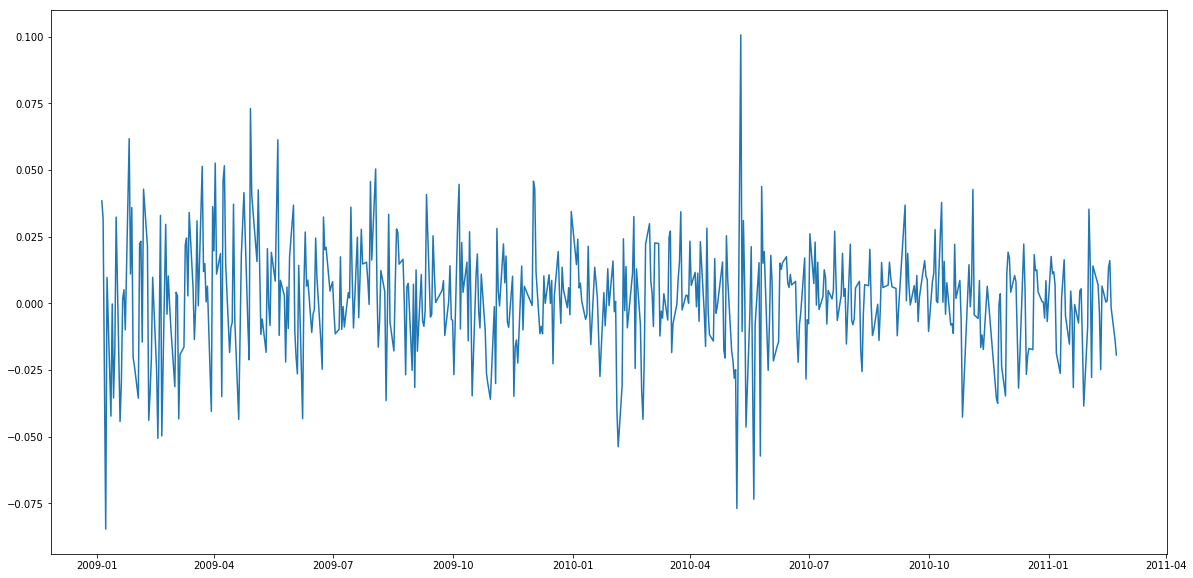

In [9]:
plt.figure(figsize = (20,10))
plt.plot(data_1.ISE_USD_BASED)

In [10]:
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_1.ISE_USD_BASED)[1])

Dickey-Fuller test: p=0.000000


In [11]:
data_1.iloc[[0, 1, 2, 3]].ISE_USD_BASED.mean()

-0.0102199845

In [12]:
test

NameError: name 'test' is not defined

In [17]:
expectation = []
variances = []
window_width = 200
for i in range(0, data_1.shape[0] - window_width):
    expectation.append(data_1.iloc[range(i, i + window_width)].ISE_USD_BASED.mean())
    variances.append(data_1.iloc[range(i, i + window_width)].ISE_USD_BASED.std())

In [18]:
expectation, variances

([0.0033198499399999994,
  0.00318100339,
  0.0031142563300000006,
  0.00323092365,
  0.0036080983199999993,
  0.00361420535,
  0.00377540281,
  0.003644925965,
  0.0036722862449999993,
  0.00357836872,
  0.0034103370549999996,
  0.00348149137,
  0.0037700028949999996,
  0.0037849638999999996,
  0.00375467892,
  0.003915835265,
  0.00364556323,
  0.00367926545,
  0.00346532144,
  0.0035214578750000004,
  0.0036893568150000006,
  0.0036928589300000004,
  0.00349872034,
  0.0033137005200000002,
  0.00327432055,
  0.0031302480550000006,
  0.0029728902799999995,
  0.0032241403400000003,
  0.0033894129149999994,
  0.0037223598749999997,
  0.00388850021,
  0.00406942741,
  0.00426577435,
  0.00428293341,
  0.004061080395,
  0.004361149880000001,
  0.0042131118135,
  0.004287205438499999,
  0.0042358071294999996,
  0.0042825084195,
  0.0042164547544999995,
  0.004386600779499999,
  0.0044627564695,
  0.0044663723695,
  0.0046455767845,
  0.0048091876895,
  0.0049168289245,
  0.0047990281395,


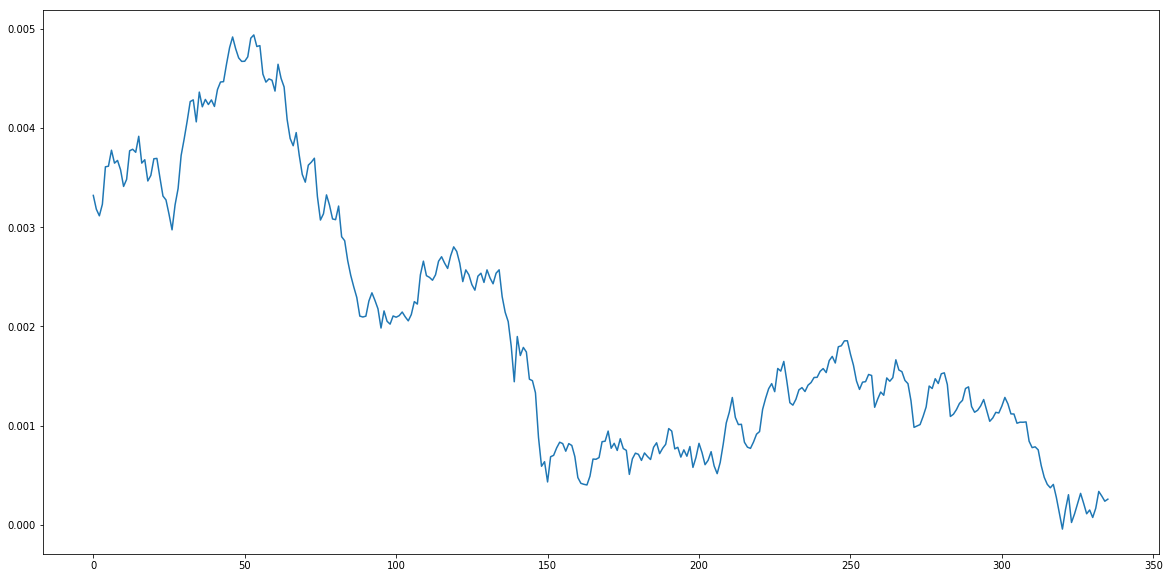

In [19]:
plt.figure(figsize = (20,10))
plt.plot(expectation)

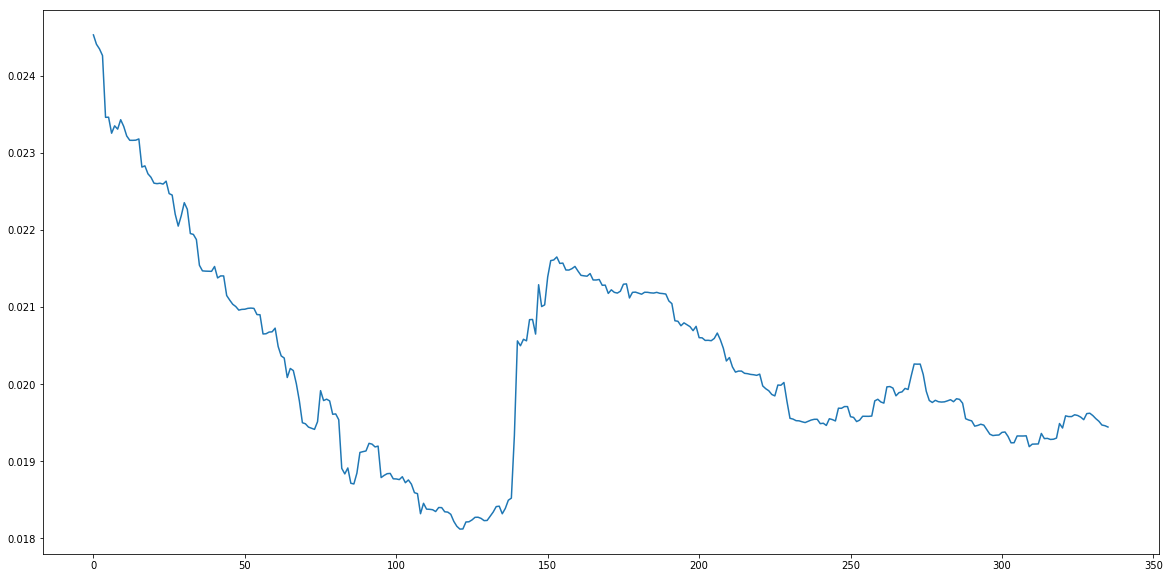

In [20]:
plt.figure(figsize = (20,10))
plt.plot(variances)

In [21]:
np.cov(data_1.ISE_USD_BASED)

array(0.00044614)

In [22]:
def auto_covariance(X, X_size, window, X_average):
    autoCov = 0
    for i in np.arange(0, X_size-window):
        autoCov += ((X[i+window])-X_average)*(X[i]-X_average)
    return (1/(X_size-1))*autoCov/(X.std())**2

In [23]:
data_1.ISE_USD_BASED.mean()

0.00155222556

In [24]:
print(auto_covariance(data_1.ISE_USD_BASED, data_1.ISE_USD_BASED.shape[0], 10, data_1.ISE_USD_BASED.mean()))

-0.013694911166321358


In [98]:

for i in range(100):
    print(i, auto_covariance(data_1.ISE_USD_BASED, data_1.ISE_USD_BASED.shape[0], i, data_1.ISE_USD_BASED.mean()))

0 0.9999999999999991
1 0.07239965996330158
2 -0.016485133216355877
3 -0.00972501322233767
4 0.001759218297119281
5 -0.006276784215012677
6 -0.006136973033279553
7 -0.05283483668250805
8 0.05097736000666572
9 0.004475053144574757
10 -0.013694911166321358
11 0.04236521464758853
12 0.012350778318171923
13 0.09687667060276257
14 0.006860526244634347
15 0.04134982849807752
16 0.037845809388286585
17 0.03583110166959538
18 0.016110907631541577
19 -0.06269697861988852
20 0.011694060554554294
21 0.025572614777757817
22 -0.04155239149292235
23 -0.010500539605557413
24 0.006757886737199916
25 0.017531738516333085
26 0.015146732030980496
27 -0.08086331958545526
28 -0.01814178354240849
29 -0.004744202482517388
30 -0.09660075998653156
31 0.07272142460301655
32 0.06494638563021285
33 -0.01973467220324568
34 -0.021177070594805752
35 -0.00788338688091107
36 -0.029599335067198054
37 -0.028550549289202462
38 0.05025443697440043
39 0.008951114567664972
40 0.05615557892506899
41 -0.045745347649603516
42 -

In [26]:
data_1.ISE_USD_BASED.std() ** 2

0.0004461357294142772

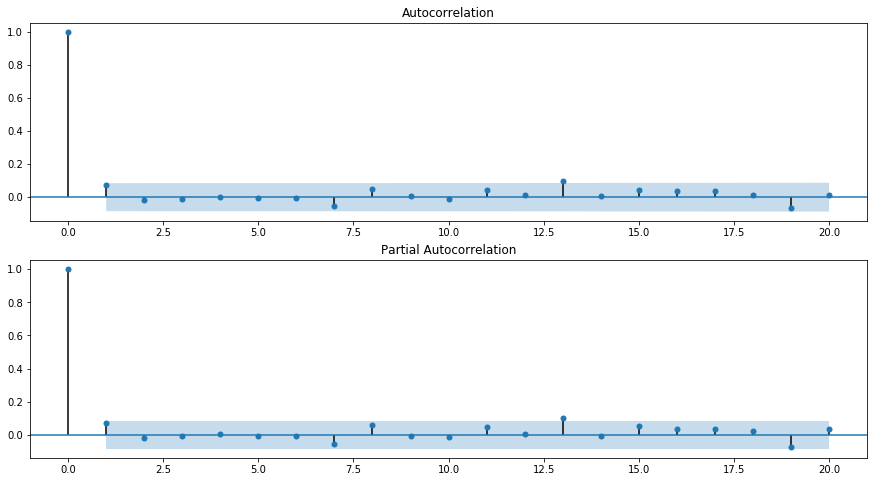

In [27]:
plt.figure(figsize = (15,8))

# autocorrelation 
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data_1.ISE_USD_BASED.values.squeeze(), lags=20, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data_1.ISE_USD_BASED.squeeze(), lags=20, ax=ax)
plt.show()

In [103]:
%matplotlib inline

In [29]:
periodogram

NameError: name 'periodogram' is not defined

[]

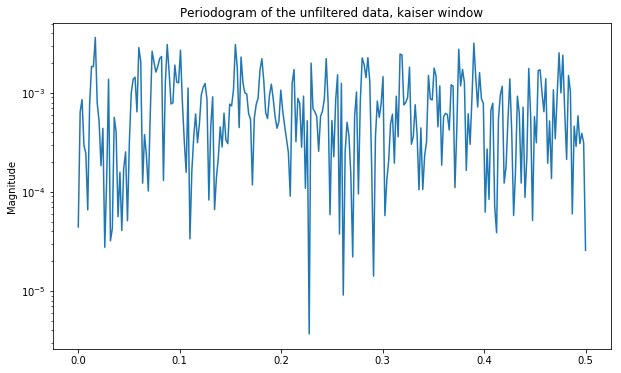

In [105]:
f1, f2 = scipy.signal.periodogram(data_1.ISE_USD_BASED.values, window = ('kaiser', 4.0))
plt.figure(figsize = (10,6))
plt.gca().set(title="Periodogram of the unfiltered data, kaiser window", ylabel="Magnitude")
_=plt.semilogy(f1, f2)
plt.plot()

[]

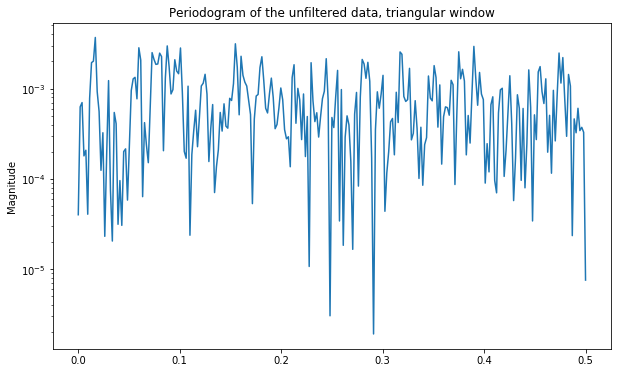

In [106]:
f1, f2 = scipy.signal.periodogram(data_1.ISE_USD_BASED.values, window = 'triang')
plt.figure(figsize = (10,6))
plt.gca().set(title="Periodogram of the unfiltered data, triangular window", ylabel="Magnitude")
_=plt.semilogy(f1, f2)
plt.plot()

[]

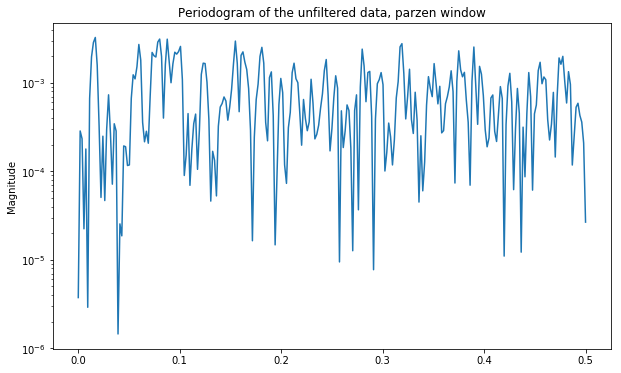

In [107]:
f1, f2 = scipy.signal.periodogram(data_1.ISE_USD_BASED.values, window = 'parzen')
plt.figure(figsize = (10,6))
plt.gca().set(title="Periodogram of the unfiltered data, parzen window", ylabel="Magnitude")
_=plt.semilogy(f1, f2)
plt.plot()

In [110]:
from scipy.ndimage import gaussian_filter

In [141]:
L = 100 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function


y = scipy.signal.lfilter(b,a,data_1.ISE_USD_BASED.values) #filter output using lfilter function
y_1 = gaussian_filter(data_1.ISE_USD_BASED.values, sigma=1)

In [142]:
plt.figure(figsize = (10,6))
plt.gca().set(ylabel="Value", xlabel="Date")
plt.plot(data_1.ISE_USD_BASED.values, color = 'y', alpha = 0.7, label = 'unfiltered')
plt.plot(y, color = 'b', alpha = 0.7, label = 'Moving average')
plt.plot(y_1, color = 'g', alpha = 0.7, label = 'Gaussian filter')
plt.legend()

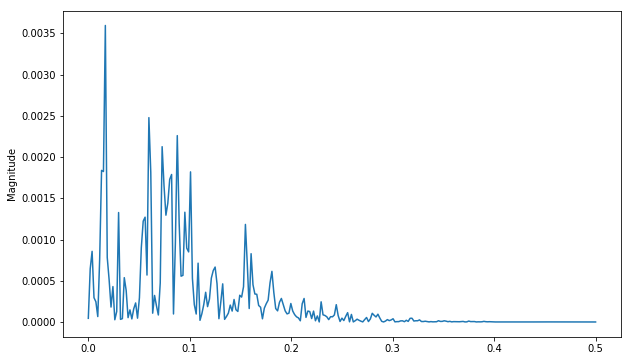

In [124]:
plt.figure(figsize = (10,6))
plt.gca().set(ylabel="Magnitude")
f1, f2 = scipy.signal.periodogram(y_1, window = ('kaiser', 4.0))
_=plt.plot(f1, f2)

In [143]:
from statsmodels.tsa import ar_model

In [144]:
%matplotlib qt

In [145]:
AR = ar_model.AR(y[:-50])
start = 40
#order = AR.select_order(maxlag=20, ic='bic')
model_fit = AR.fit()#maxlag=order)
pred = model_fit.predict(start=start,
                             end=len(data_1)+100,
                            dynamic=False)

In [147]:
plt.figure(figsize = (10,6))
plt.gca().set(ylabel="Value", xlabel="Date")
plt.plot(y[39:], color = 'r', label = 'history')
plt.plot(pred, color = 'b', label = 'prediction')

In [68]:
AR = ar_model.AR(data_1.ISE_USD_BASED.values[:-50])
start = 15
order = AR.select_order(maxlag=20, ic='bic')
model_fit = AR.fit(maxlag=order)
pred = model_fit.predict(start=start,
                             end=len(data_1)+100,
                            dynamic=False)

In [81]:
plt.figure(figsize = (20,10))
plt.plot(data_1.ISE_USD_BASED.values[14:], color = 'r')
plt.plot(pred, color = 'b')

In [92]:
data_oil = pd.read_csv('brent-daily.csv', header = 0, index_col = 0)
data_oil['Price_delta'] = (data_oil['Price'] - data_oil['Price'].shift(1)) / data_oil['Price']

In [93]:
data_oil['Price_delta']

Date
1987-05-20         NaN
1987-05-21   -0.009756
1987-05-22    0.005391
1987-05-25    0.002688
1987-05-26    0.001610
1987-05-27   -0.001613
1987-05-28    0.000000
1987-05-29   -0.001076
1987-06-01    0.003753
1987-06-02    0.001606
1987-06-03    0.003733
1987-06-04    0.001597
1987-06-05   -0.006971
1987-06-08    0.005333
1987-06-09    0.001597
1987-06-10    0.000000
1987-06-11   -0.005353
1987-06-12    0.005325
1987-06-16    0.006349
1987-06-17    0.006831
1987-06-18    0.001050
1987-06-19    0.000000
1987-06-22    0.002618
1987-06-23   -0.010582
1987-06-24   -0.008000
1987-06-25   -0.002674
1987-06-26    0.019916
1987-06-29    0.003655
1987-06-30   -0.003669
1987-07-01   -0.005269
                ...   
2019-04-30    0.013437
2019-05-01   -0.002500
2019-05-02   -0.020550
2019-05-03    0.019319
2019-05-06    0.000000
2019-05-07   -0.013666
2019-05-08    0.001547
2019-05-09   -0.006798
2019-05-10    0.014240
2019-05-13    0.009952
2019-05-14    0.002482
2019-05-15    0.007662
2019-0

In [94]:
data_1.join(data_oil)

,ISE_TL_BASED,ISE_USD_BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,Price,Price_delta
date,,,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,45.84,0.063264
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,48.89,0.062385
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,46.23,-0.057538
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,42.94,-0.076619
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,42.34,-0.014171
2009-01-12,-0.029191,-0.042361,-0.022823,-0.013526,-0.005026,-0.049039,-0.053849,-0.012451,-0.022630,40.86,-0.036221
2009-01-13,0.015445,-0.000272,0.001757,-0.017674,-0.006141,0.000000,0.003572,-0.012220,-0.004827,43.05,0.050871
2009-01-14,-0.041168,-0.035552,-0.034032,-0.047383,-0.050945,0.002912,-0.040302,-0.045220,-0.008677,42.27,-0.018453
2009-01-15,0.000662,-0.017268,0.001328,-0.019551,-0.014335,-0.050448,0.030314,-0.012070,-0.023429,42.32,0.001181


In [95]:
data_add = data_1.join(data_oil).fillna(method='ffill')

In [171]:
data_add.head(100)

,ISE_TL_BASED,ISE_USD_BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,Price,Price_delta
date,,,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,45.84,0.063264
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,48.89,0.062385
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,46.23,-0.057538
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,42.94,-0.076619
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,42.34,-0.014171
2009-01-12,-0.029191,-0.042361,-0.022823,-0.013526,-0.005026,-0.049039,-0.053849,-0.012451,-0.022630,40.86,-0.036221
2009-01-13,0.015445,-0.000272,0.001757,-0.017674,-0.006141,0.000000,0.003572,-0.012220,-0.004827,43.05,0.050871
2009-01-14,-0.041168,-0.035552,-0.034032,-0.047383,-0.050945,0.002912,-0.040302,-0.045220,-0.008677,42.27,-0.018453
2009-01-15,0.000662,-0.017268,0.001328,-0.019551,-0.014335,-0.050448,0.030314,-0.012070,-0.023429,42.32,0.001181


In [160]:
np.cov(data_add.ISE_USD_BASED.values, data_add.Price_delta.values)

array([[0.00044614, 0.0002339 ],
       [0.0002339 , 0.00060656]])

In [153]:
def mutautocov(X, Y, tau, shift):
    autoCov = 0
    for i in np.arange(0, len(X)-tau-shift):
        autoCov += ((X[i+tau+shift])-np.mean(X))*(Y[i+shift]-np.mean(Y))
    return (1 / (len(X) - 1)) * autoCov

In [155]:
def mutautocorr(X, Y, tau, shift):
    return mutautocov(X, Y, tau, shift) / mutautocov(X, Y, 0, shift)

In [158]:
mutautocorr(data_add.ISE_USD_BASED.values, data_add.DAX.values, 1, 0)

0.17354713061627652

In [161]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [164]:
model = sm.tsa.VAR(endog=data_add[['ISE_USD_BASED', 'DAX', 'Price_delta']][:-17])
model_fit = model.fit()

print(model_fit.summary())

  Summary of Regression Results  
Model:                        VAR
Method:                       OLS
Date:           Чт, 20, июн, 2019
Time:                    12:51:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.2596
Nobs:                     518.000    HQIC:                  -24.3195
Log likelihood:           4115.71    FPE:                2.63887e-11
AIC:                     -24.3581    Det(Omega_mle):     2.57867e-11
--------------------------------------------------------------------
Results for equation ISE_USD_BASED
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.001387         0.000933            1.486           0.137
L1.ISE_USD_BASED         0.012134         0.058141            0.209           0.835
L1.DAX                   0.155045         0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [166]:
from sklearn.metrics import mean_squared_error

In [185]:
size = int(data_add.shape[0] * 0.8) 
train, test = data_add[['ISE_USD_BASED', 'DAX', 'Price_delta']][:size], data_add[['ISE_USD_BASED', 'DAX', 'Price_delta']][size:]

history = train
predictions = list()

for t in range(test.shape[0]):
    model = sm.tsa.VAR(endog=history)
    model_fit = model.fit()
    output = model_fit.forecast(model_fit.y, steps=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history = history.append(obs)
    # print('predicted=[%f,%f], expected=[%f,%f]' % (yhat[0], yhat[1], obs[0], obs[1]))

pred = pd.DataFrame(index=range(0,len(predictions)),columns=['ISE_USD_BASED', 'DAX', 'Price_delta'])
for j in range(3):
    for i in range(0, len(predictions)):
        pred.iloc[i][j] = predictions[i][j]
pred.head()

for i in ['ISE_USD_BASED', 'DAX', 'Price_delta']:
    print('MSE value for %s is : %7f' 
          % (i, mean_squared_error(pred[i], test[i])))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

MSE value for ISE_USD_BASED is : 0.000270
MSE value for DAX is : 0.000066
MSE value for Price_delta is : 0.000171


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [180]:
%matplotlib inline

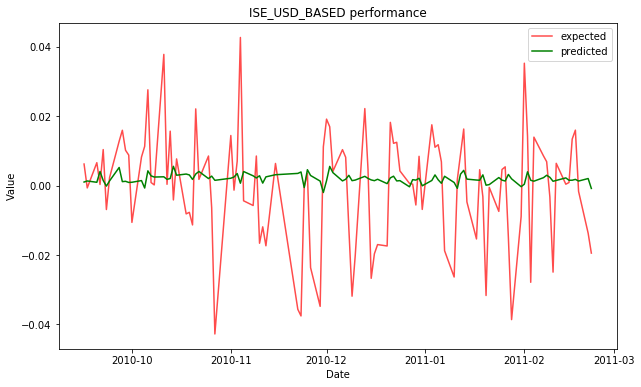

In [186]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test['ISE_USD_BASED'], color='red', label="expected", alpha = 0.7)
plt.plot(test.index, pred['ISE_USD_BASED'], color='green', label="predicted", alpha = 1)
plt.gca().set(title="ISE_USD_BASED performance", xlabel="Date", ylabel="Value")
plt.legend()
plt.show()

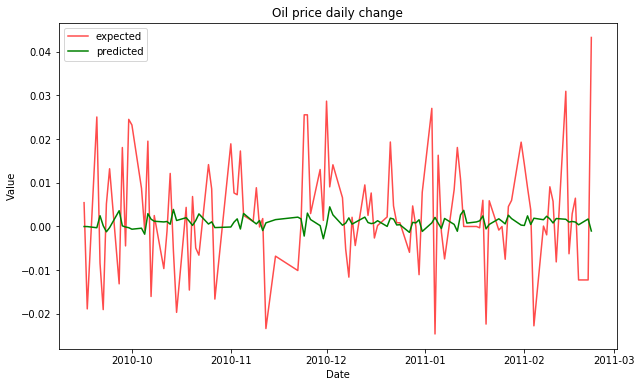

In [187]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test['Price_delta'], color='red', label="expected", alpha = 0.7)
plt.plot(test.index, pred['Price_delta'], color='green', label="predicted", alpha = 1)
plt.gca().set(title="Oil price daily change", xlabel="Date", ylabel="Value")
plt.legend()
plt.show()

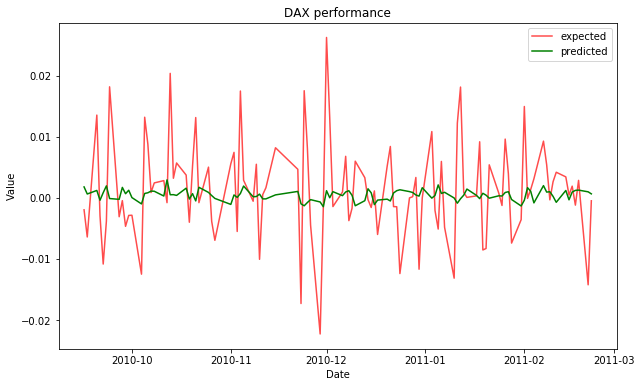

In [188]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test['DAX'], color='red', label="expected", alpha = 0.7)
plt.plot(test.index, pred['DAX'], color='green', label="predicted", alpha = 1)
plt.gca().set(title="DAX performance", xlabel="Date", ylabel="Value")
plt.legend()
plt.show()